# Load modules

In [291]:
import numpy as np
import pandas as pd
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
from pipedream_solver.nutils import interpolate_sample

import matplotlib.pyplot as plt
import seaborn as sns

import influxdb 
import pandas as pd
from dateutil import tz

# import the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

import pandas as pd
import numpy as np
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
import ast
import pandas as pd
import seaborn as sns
sns.set_palette('husl')



# Load pipedream model information 

In [292]:
superjunctions = pd.read_csv('waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_excel('Waller_HMS_model_data.xlsx', sheet_name=0)

In [293]:
superlinks

,name,id.1,sj_0,sj_1,in_offset,out_offset,dx,n,shape,g1,g2,g3,g4,Q_0,h_0,ctrl,A_s,A_c,C
id,,,,,,,,,,,,,,,,,,,
0,R_WLR01,0,30,0,0.0,0.0,238.658400,0.040,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
1,R_WLR02,1,0,1,0.0,0.0,564.184800,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
2,R_WLR04,2,2,3,0.0,0.0,580.034400,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
3,R_WLR03,3,1,3,0.0,0.0,832.917868,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
4,R_WLR05,4,3,4,0.0,0.0,631.305780,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
5,R_WLR06,5,4,5,0.0,0.0,446.966267,0.050,Trapezoidal,2.4384,4.5720,2.099738,0.0,0.0,0.00001,False,1.0,0.0,0.0
6,R_WLR07,6,5,6,0.0,0.0,526.072766,0.050,Trapezoidal,2.4384,5.4864,2.386065,0.0,0.0,0.00001,False,1.0,0.0,0.0
7,R_HEM04,7,24,25,0.0,0.0,528.828000,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0
8,R_HEM02,8,28,23,0.0,0.0,430.682400,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0


# Specify simulation parameters

# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[21, ['g2', 'g3']] = 0., 7.777146367746631
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.

# Manual edits to hydrology params
lag_time_adjust_ratio = 0.4
CN_adjust_ratio = 1.0

# Simulation params
sample_interval = 30
node_ids = ['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Define runoff functions

In [294]:
superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [295]:
def scs_composite_CN(CN_C, A_Imp):
    # Convert CN to composite CN given percent impervious area
    m = (99 - CN_C) / 100
    b = CN_C
    y = m * A_Imp + b
    return y

In [296]:
def scs_excess_precipitation(precip__in, CN): 
    # Set up SCS parameters
    P = precip__in.values
    S = 1000 / CN -10 #potential maximum abstraction
    Ia = 0.2 * S #inital abstraction
    step=0
    
    # Compute cumulative excess precipitation
    Pes = []
    P_now = 0
    n = len(P)
    
    for t in range(n):
        Pt = P[t] #precipitaton at time t
        
        #if Pt!=0:
        #    step=0
        #else:ki
        #    step=step+1
        
        #if step>2500:
        #    P_now = max(0.2e-3,P_now*0.99985)
         
        #if P_now>0:
            #P_now = P_now-0.00031
            #P_now = P_now-0.0001
         #   P_now = max(0,P_now*0.99985)
        P_now = Pt + P_now  #accumulated precipitation
       
        if P_now <= Ia:
            Pe = 0.
        else:        
            Pe = (P_now - 0.2 * S)**2 / (P_now + 0.8 * S) #excess precipitation
            
        
        #S=S+0.00025
                
        
        Pes.append(Pe)
        

        
        
      

        
        
    # Assign time index to excess precipitation output
    excess_precip_cum__in = pd.Series(Pes, index=precip__in.index)
    return excess_precip_cum__in

In [297]:
def scs_uh_runoff(excess_precip__in, uh__dimless, area__sq_mi, sample_interval,lag_time__min):
    # Give unit hydrograph a time dimension corresponding to lag time
    uh = uh__dimless.copy()
    uh_time = uh['time ratios'] * lag_time__min * s_per_min * ns_per_s
    uh_time = pd.to_datetime(uh_time.rename('time'))
    uh = uh.set_index(uh_time)['discharge ratios']
    # Resample unit hydrograph to desired time interval
    uh = uh.resample(f'{sample_interval}s').mean().interpolate()
    uh = uh.values    
    # Scale unit hydrograph to have area of unity
    uh_scaled = uh / uh.sum()
    
    # Convolve excess precipitation and unit hydrograph
    conv = np.convolve(excess_precip__in.values, uh_scaled)
    # Convert to outflow 
    area__sq_ft = area__sq_mi * (ft_per_mi)**2
    conv__ft = conv / in_per_ft
    runoff__cfs = (conv__ft * area__sq_ft) / sample_interval
    runoff__cms = runoff__cfs * (m_per_ft)**3
    time_index = pd.date_range(start=excess_precip__in.index.min(), 
                               periods=runoff__cms.size, 
                               freq=f'{sample_interval}s')
    # Return runoff in cubic meters per second
    runoff__cms = pd.Series(runoff__cms, index=time_index)
    return runoff__cms

# Load LCRA flow, depth, and precipitation data

In [298]:
# Add LCRA data (Flow, depth, and precipitation data for the 'Waller Creek at 23rd Street' gage from the LCRA site.)
LCRA_2022 = pd.read_excel('/Users/future_water_system/Desktop/Data/LCRA_Export/LCRA_Export_2022.xlsx')
LCRA_2023 = pd.read_excel('/Users/future_water_system/Desktop/Data/LCRA_Export/LCRA_Export_2023.xlsx')
LCRA=pd.concat([LCRA_2022[8:],LCRA_2023[8:]])
LCRA = LCRA.set_index('Site Name')
LCRA.index.name = 'Time'
# Handle timezone
LCRA = LCRA.tz_localize('US/Central', nonexistent='shift_forward').tz_convert('UTC')
# Rename columns to be more descriptive
LCRA = LCRA.rename(columns={'W3A' : 'depth__ft', 'W3A.1' : 'flow_rate__cfs', 'W3A.3' : 'precip_tot__in'})
LCRA = LCRA.drop('W3A.2', axis=1)
# Filter dataset to time period


In [299]:
def precip_data(LCRA, start_date, end_date):
    LCRA = LCRA.loc[start_date:end_date]

    # Compute dt for each time bin
    LCRA['dt__s'] = np.roll(pd.Series(LCRA.index).diff(1).dt.seconds.values, -1)
    # Compute precipitation rate from total inches and dt
    LCRA['precip_rate__in_per_s'] = LCRA['precip_tot__in'] / LCRA['dt__s']

    # Compute inches of precipitation for desired sample interval
    precip__in = sample_interval * LCRA['precip_rate__in_per_s'].resample(f'{sample_interval}s').mean().interpolate()
    return precip__in

# Load ultrasonic sensor data

In [300]:
# Visualizing the actual depth of Waller Creeks  

# set up the lists(node_id and length between node and bottom)
node_id_list=['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
length_ntb_list =[3911.6, 3175, 4927.6, 4978.4, 3556]
ntb_df=pd.DataFrame(length_ntb_list, columns=['depth'])
ntb_df=ntb_df.set_index([node_id_list])

#set up the influxDBClient 
client_dict = {'host' : 'ec2-3-91-156-8.compute-1.amazonaws.com',
               'port' : 8086,
               'username' : 'generic_node',
               'password' : 'GlareShellTwilight',
               'database' : 'RAW'}

client = influxdb.InfluxDBClient(**client_dict)

# definition of query to call influxdb data
def run_query(client, field, measurement, tags, pagesize=10000):
    
    #select the length of node to bottom  
    length_ntb=ntb_df.at[tags['node_id'],'depth']
    
    collect = []
    times = []
    values = []
    q = True
    pagenum = 0
    # Single quotes around tags might not always work
    tag_str = ' AND '.join(["{key}='{value}'".format(key=key, value=value) for key, value
                            in tags.items()])
    
    
    while q:
        q = client.query(("SELECT {field} FROM {measurement} WHERE {tags} "
                          "LIMIT {pagesize} OFFSET {page}")
                          .format(field=field, measurement=measurement, tags=tag_str,
                                  pagesize=pagesize, page=pagenum*pagesize))
        if q:
            collect.append(q[measurement])
           
        pagenum += 1
    for resultset in collect:
        for reading in resultset:
            
            #######time variable##########
            dt_gmt=pd.Timestamp(reading['time'],tz='Etc/GMT')
            
            #update time of data with local time zone 
            #difference_time =pd.Timestamp(reading['time'],tz='GMT')
            #local_time = dt_gmt +
            times.append(dt_gmt)
            
            #local_zone=tz.tzlocal() 
            #local_dt=dt_gmt.astimezone(local_zone)
            #times.append(local_dt)
            ################################
            values.append((length_ntb-reading[field])*0.001)
    s = pd.Series(values, index=times)
    
    s.index = pd.to_datetime(s.index)
    
    
    drop_index=s[s<=0].index
    s=s.drop(index=drop_index)


    return s





# Compute runoff into each superjunction

In [301]:
# Compute runoff into each superjunction
def Model_initialization(precip__in,subbasins):
    keepGoing=True
    while keepGoing:
        try:
            Q_in = {}
            CNs = []
            # Manual edits to hydrology params
            lag_time_adjust_ratio = 0.4
            CN_adjust_ratio = 1.0


            # For each subbasin...
            for i in range(len(subbasins)):
                # Load subbasin parameters
                CN_C = subbasins['Curve Number'][i]
                A_Imp = subbasins['Impervious Percent'][i]
                area__sq_mi = subbasins['Area (mi2)'][i]
                downstream = subbasins['Downstream'][i]
                lag_time__min = subbasins['Lag Time'][i] * lag_time_adjust_ratio

                # Compute composite curve number
                CN = scs_composite_CN(CN_C, A_Imp) * CN_adjust_ratio
                CN = min(CN, 99)

                # Compute excess precipitation
                excess_precip_cum__in = scs_excess_precipitation(precip__in, CN)
                excess_precip__in = -excess_precip_cum__in.diff(-1).fillna(0.)

                # Compute runoff using unit hydrograph
                runoff__cms = scs_uh_runoff(excess_precip__in, uh__dimless, area__sq_mi, sample_interval,lag_time__min)
                Q_in[downstream] = runoff__cms

            # Format flow input as DataFrame
            Q_in = pd.DataFrame.from_dict(Q_in)
            # Add flow input for missing sites
            Q_in['UPSTREAM_WALLER'] = Q_in['R_WLR01']
            Q_in['UPSTREAM_HEMPHILL'] = Q_in['R_HEM01']
            Q_in[[name for name in superjunctions['name'] if not name in Q_in.columns]] = 0.
            # Ensure flow input is only for superjunctions specified in table
            Q_in = Q_in[superjunctions['name'].tolist()]
            # Remove NaN values
            Q_in = Q_in.fillna(0.)
            # Copy flow input with original timestamps
            Q_in_orig = Q_in.copy()
            # Convert flow input index to integer index starting with zero
            Q_in.index = Q_in.index.astype(int) / 1e9
            Q_in.index -= Q_in.index.min()
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True


    return excess_precip__in,Q_in,Q_in_orig

In [307]:
# Run simulation without KF
def Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,load_data):
    keepGoing=True
    while keepGoing:
        try:


            superlink = SuperLink(superlinks, superjunctions,internal_links=30, mobile_elements=True)
            

            H_j = []
            h_Ik = []
            Q_uk = []
            Q_dk = []

            # Set constant timestep (in seconds)

            # Add constant baseflow
            baseflow = 0.5e-4  * np.ones(superlink._h_Ik.size)

            # Create simulation context manager
            with Simulation(superlink, Q_in=Q_in) as simulation:
                simulation.model.load_state(load_data)
                # While simulation time has not expired...
                while simulation.t <= simulation.t_end:
                    # Step model forward in time
                    simulation.step(dt=dt, num_iter=8, Q_Ik=baseflow)
                    simulation.model.reposition_junctions()
                    # Print progress bar
                    simulation.print_progress()
                    # Save states
                    H_j.append(simulation.model.H_j.copy())
                    h_Ik.append(simulation.model.h_Ik.copy())
                    Q_uk.append(simulation.model.Q_uk.copy())
                    Q_dk.append(simulation.model.Q_dk.copy())

            time_index = pd.date_range(start=excess_precip__in.index.min(), 
                                       periods=len(H_j), 
                                       freq=f'{dt}s')

            # Convert saved states to dataframes
            H_j = pd.DataFrame(np.vstack(H_j), index=time_index, columns=superjunctions['name'])
            h_Ik = pd.DataFrame(np.vstack(h_Ik), index=time_index)
            Q_uk = pd.DataFrame(np.vstack(Q_uk), index=time_index, columns=superlinks['name'])
            Q_dk = pd.DataFrame(np.vstack(Q_dk), index=time_index, columns=superlinks['name'])

            # Compute depth
            h_j = H_j - simulation.model._z_inv_j
            final_data=simulation.model.states
            
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True

    
    return H_j,h_Ik,Q_uk,Q_dk,h_j,final_data

# Automatic figure graph

In [308]:
def save_fig_depth(file_name):
   
    fig, ax = plt.subplots(figsize=(18, 6))

    s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge3'})
    x2=s[start_date:end_date]
    t_b2 =s[start_date:end_date].index
    plt.plot(t_b2,x2,'-', label='Bridge3')

    (m_per_ft * LCRA['depth__ft'][start_date:end_date]).plot(ax=ax, label='LCRA', c='r')




    h_j[site_junction_name].plot(ax=ax, label='Model', c='blue', zorder=3)


    plt.xlabel('Time', size=15)
    plt.ylabel('Depth (m)', size=15)
    plt.legend()
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_without_bridge2&4&5_depth_99985.png')
    
def save_fig_flowrate(file_name):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(Q_uk[site_link_name], label='Model', c='b')
    (m_per_ft**3 * LCRA['flow_rate__cfs'][start_date:end_date]).plot(ax=ax, label='LCRA', c='r')
    plt.legend()
    plt.xlabel('Time', size=15)
    plt.ylabel('Flow rate (cms)', size=15)
    plt.title('Flow rate comparison', size=15)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_flow_rate_99985.png')

def save_fig_calibration(file_name):
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.scatter(m_per_ft * LCRA['depth__ft'][start_date:end_date], m_per_ft**3 * LCRA['flow_rate__cfs'][start_date:end_date], label='LCRA',color='red')
    plt.scatter(h_j[site_junction_name], Q_uk[site_link_name].values, label='Model' ,color='blue')
    plt.legend()
    plt.xlabel('Depth',size=13)
    plt.ylabel('Discharge',size=13)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_calibration_99985.png')
def save_fig_precip(file_name):
    fig, ax = plt.subplots(figsize=(18, 6))

    plt.plot(precip__in)
    plt.xlabel('Time', size=15)
    plt.ylabel('Precipitation (inch)', size=15)
    plt.title('Rain Intensity', size=15)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_precip_99985.png')  

# Simulation 

In [309]:


## Load pipedream model information 
superjunctions = pd.read_csv('waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_csv('/Users/future_water_system/Desktop/WallerCreek-KalmanFilter/Waller_HMS_model_data.csv', index_col=0)

superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [310]:

# Specify simulation parameters
# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[21, ['g2', 'g3']] = 0., 7.777146367746631
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.
#superjunctions['z_inv'][14]=156.0

# Simulation params
sample_interval = 30

site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Load unit hydrograph
# Load dimensionless unit hydrograph
uh__dimless = pd.read_csv('unit hydrograph.csv')
# Drop unnecessary columns and rows
uh__dimless = uh__dimless[['time ratios', 'discharge ratios']].dropna()
dt = 10

In [311]:
start_date='20220627'

end_date='20230520'

final_data={}
file_name='startDate'+str(start_date)+'_endDate'+str(end_date)
print(file_name)

precip__in=precip_data(LCRA, start_date, end_date)
if precip__in.empty != True:
    excess_precip__in,Q_in,Q_in_orig=Model_initialization(precip__in,subbasins)
    H_j,h_Ik,Q_uk,Q_dk,h_j,final_data=Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,final_data)
    final_data['t']=0
    
    #save_fig_precip(file_name)
    #save_fig_depth(file_name)
    #save_fig_flowrate(file_name)
    #save_fig_calibration(file_name)










startDate20220627_endDate20230520
[==================================================] 100.0% [2512.52 s]

# Plot observed vs. modeled depth-discharge relationship

Text(0, 0.5, 'Discharge')

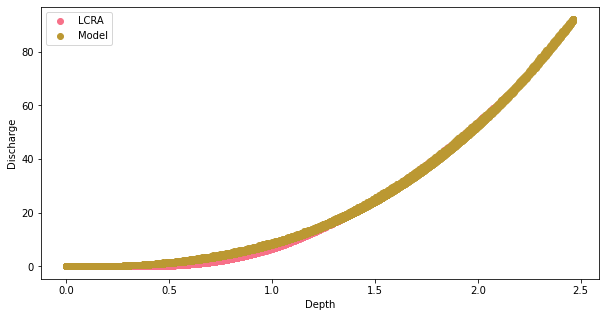

In [312]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(m_per_ft * LCRA['depth__ft'], m_per_ft**3 * LCRA['flow_rate__cfs'], label='LCRA')
plt.scatter(h_j[site_junction_name], Q_uk[site_link_name].values, label='Model')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Discharge')


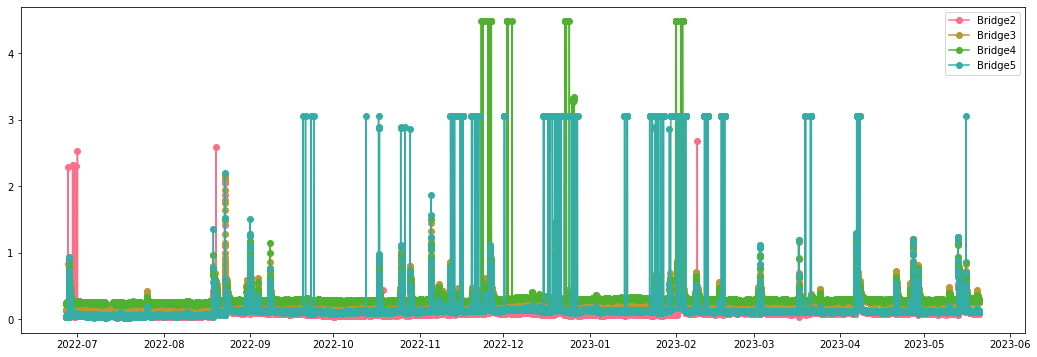

In [314]:

fig, ax = plt.subplots(figsize=(18, 6))
s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge2'})
x2=s[start_date:end_date]
t_b2 =s[start_date:end_date].index
plt.plot(t_b2,x2,'o-', label='Bridge2')

s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge3'})
x3=s[start_date:end_date]
t_b3 =s[start_date:end_date].index
plt.plot(t_b3,x3,'o-', label='Bridge3')

s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge4'})
x4=s[start_date:end_date]
t_b4 =s[start_date:end_date].index
plt.plot(t_b4,x4,'o-', label='Bridge4')

s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge5'})
x5=s[start_date:end_date]
t_b5 =s[start_date:end_date].index
plt.plot(t_b5,x5,'o-', label='Bridge5')

plt.legend()



In [315]:
# Compute the time index of the saved output data
time_index = pd.date_range(start=excess_precip__in.index.min(), 
                           periods=len(H_j), 
                           freq=f'{dt}s')



# Sensor Analysis (RAW)

In [317]:
df_simu=pd.DataFrame({'simulation':h_j[site_junction_name]})
df_simu.index=df_simu.index.strftime('%Y-%m-%d %H:%M:%S')
df_sensor=pd.DataFrame({'sensor2':x2,'sensor3':x3,'sensor4':x4,'sensor5':x5})
df_sensor.index=df_sensor.index.strftime('%Y-%m-%d %H:%M:00')
df_all=df_simu.join(df_sensor, how='outer')

In [318]:
head_1=H_j['J_WLR16_32ND']-superjunctions.z_inv[13]
head_2=H_j['J_WLR18_COMB_HEMP']-superjunctions.z_inv[14]
head_3=H_j['J_WLR19_23RD']-superjunctions.z_inv[15]
head_4=H_j['J_WLR20_TRINITY']-superjunctions.z_inv[16]
head_1=head_1+0.07
head_3=head_3+0.08
head_4=head_4+0.21

#df_simu=pd.DataFrame({'simulation2':head_1,'simulation3':head_2,'simulation4':head_3,'simulation5':head_2})
#df_simu=pd.DataFrame({'simulation':h_j[site_junction_name]})
df_simu=pd.DataFrame({'simulation':head_2})
df_simu.index=df_simu.index.strftime('%Y-%m-%d %H:%M:%S')
df_sensor=pd.DataFrame({'sensor2':x2,'sensor3':x3,'sensor4':x4,'sensor5':x5})
df_sensor.index=df_sensor.index.strftime('%Y-%m-%d %H:%M:00')
df_all=df_simu.join(df_sensor, how='outer')

In [566]:


df_simu=pd.DataFrame({'simulation':head_1})
df_simu.index=df_simu.index.strftime('%Y-%m-%d %H:%M:%S')
df_sensor=pd.DataFrame({'sensor2':x2})
df_sensor.index=df_sensor.index.strftime('%Y-%m-%d %H:%M:00')
df_all1=df_simu.join(df_sensor, how='outer')

df_simu=pd.DataFrame({'simulation':head_2})
df_simu.index=df_simu.index.strftime('%Y-%m-%d %H:%M:%S')
df_sensor=pd.DataFrame({'sensor3':x3,'sensor5':x5})
df_sensor.index=df_sensor.index.strftime('%Y-%m-%d %H:%M:00')
df_all2=df_simu.join(df_sensor, how='outer')

df_simu=pd.DataFrame({'simulation':head_4})
df_simu.index=df_simu.index.strftime('%Y-%m-%d %H:%M:%S')
df_sensor=pd.DataFrame({'sensor4':x4})
df_sensor.index=df_sensor.index.strftime('%Y-%m-%d %H:%M:00')
df_all3=df_simu.join(df_sensor, how='outer')


selection1=df_all1['2022-08-18 00:00:00':'2023-05-20 00:00:00']
selection2=df_all2['2022-08-18 00:00:00':'2023-05-20 00:00:00']
selection3=df_all3['2022-08-18 00:00:00':'2023-05-20 00:00:00']


In [567]:
base_flow_calibration={'sensor2': -0.061,'sensor3':0.09,'sensor4':0.143,'sensor5':-0.018} # head_2
#base_flow_calibration={'sensor2':0.0 ,'sensor3':0.01,'sensor4':0.052,'sensor5':0.025}
#base_flow_calibration={'sensor2':0.0 ,'sensor3':0.00,'sensor4':0.052,'sensor5':0.025}
#base_flow_calibration={'sensor2': -0.061,'sensor3':0.14,'sensor4':0.19,'sensor5':0.025} # head_3
#base_flow_calibration={'sensor2': -0.061,'sensor3':0.001,'sensor4':0.053,'sensor5':-0.11} #head_4
#base_flow_calibration['sensor2']
base_flow_calibration={'sensor2': 0.0,'sensor3':0.12,'sensor4':0.19,'sensor5':-0.001} 
base_flow_calibration={'sensor2': 0.0,'sensor3':0.1,'sensor4':0.19,'sensor5':-0.02} 
#base_flow_calibration={'sensor2': 0.0,'sensor3':0.12,'sensor4':0.19,'sensor5':0.09} 
#base_flow_calibration={'sensor2': -0.021,'sensor3':0.014,'sensor4':0.163,'sensor5':-0.1} 

In [568]:
sensor_list =['sensor2','sensor3','sensor4','sensor5']
simulation_list =['simulation2','simulation3','simulation4','simulation5']
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [569]:
from sklearn.metrics import r2_score

sensor='sensor2'
check=pd.DataFrame(selection1, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor0=check[sensor]
data_simulation0=check['simulation']
r2_score0=r2_score(check['simulation'],check[sensor])

sensor='sensor3'
check=pd.DataFrame(selection2, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor1=check[sensor]
data_simulation1=check['simulation']
r2_score1=r2_score(check['simulation'],check[sensor])

sensor='sensor4'
check=pd.DataFrame(selection3, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor2=check[sensor]
data_simulation2=check['simulation']
r2_score2=r2_score(check['simulation'],check[sensor])


sensor='sensor5'
check=pd.DataFrame(selection2, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor3=check[sensor]
data_simulation3=check['simulation']
r2_score3=r2_score(check['simulation'],check[sensor])



In [570]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create an instance of RANSACRegressor
#
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=30, max_trials=30,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=1)
#
#


In [571]:
def RANSAC(data_sensor,data_simulation):
    from sklearn.metrics import r2_score, mean_squared_error
    y = data_sensor.to_numpy().reshape(-1, 1)
    X = data_simulation.to_numpy().reshape(-1, 1)
    #

    # Fit the model
    #
    ransac.fit(X, y)

    # Get the Inlier mask; Create outlier mask
    #
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)


    r2_score_inlier=r2_score(X[inlier_mask], y[inlier_mask])

    r2_score=r2_score(X, y)

    return inlier_mask, outlier_mask, r2_score_inlier, r2_score, X, y

In [572]:

sensor='sensor2'
check=pd.DataFrame(selection1, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor0=check[sensor]
data_simulation0=check['simulation']
inlier_mask0, outlier_mask0, r2_score_inlier0, r2_score0,X0,y0=RANSAC(data_sensor0,data_simulation0)

sensor='sensor3'
check=pd.DataFrame(selection2, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor1=check[sensor]
data_simulation1=check['simulation']
inlier_mask1, outlier_mask1, r2_score_inlier1, r2_score1,X1,y1=RANSAC(data_sensor1,data_simulation1)

sensor='sensor4'
check=pd.DataFrame(selection3, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor2=check[sensor]
data_simulation2=check['simulation']
inlier_mask2, outlier_mask2, r2_score_inlier2, r2_score2,X2,y2=RANSAC(data_sensor2,data_simulation2)


sensor='sensor5'
check=pd.DataFrame(selection2, columns=['simulation',sensor])
check=check.dropna()
check['simulation']=check['simulation']+ base_flow_calibration[sensor]
data_sensor3=check[sensor]
data_simulation3=check['simulation']
inlier_mask3, outlier_mask3, r2_score_inlier3, r2_score3 ,X3,y3=RANSAC(data_sensor3,data_simulation3)


/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(
/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(
/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(
/Users/future_water_system/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be remove

Text(0.1, 0.5, 'Sensor Water depth(m)')

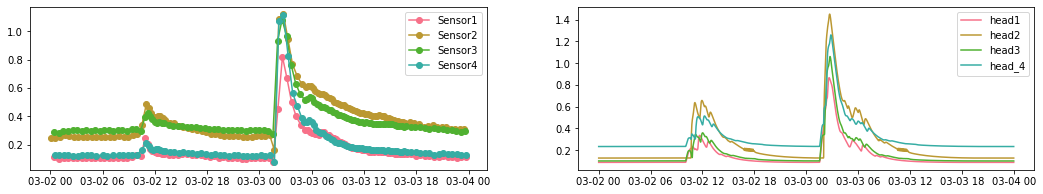

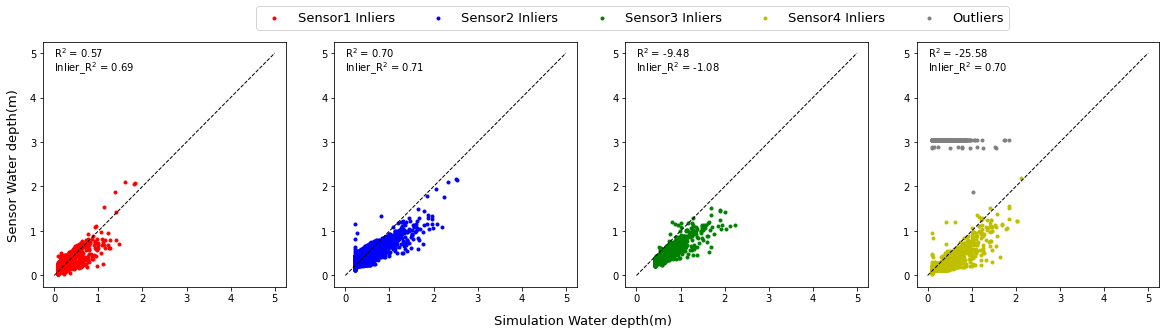

In [574]:
import pandas as pd
import math
from matplotlib import pyplot as plt

start_date='20230302'
end_date='20230303'

fig, axes = plt.subplots(1,2 ,figsize=(18, 3))
a = run_query(client, 'value', 'depth', {'node_id' : 'Bridge2'})
a2=a[start_date:end_date]
t_a2 =a[start_date:end_date].index
axes[0].plot(t_a2,a2,'o-', label='Sensor1')

a = run_query(client, 'value', 'depth', {'node_id' : 'Bridge3'})
a3=a[start_date:end_date]
t_a3 =a[start_date:end_date].index
axes[0].plot(t_a3,a3,'o-', label='Sensor2')

a = run_query(client, 'value', 'depth', {'node_id' : 'Bridge4'})
a4=a[start_date:end_date]
t_a4 =a[start_date:end_date].index
axes[0].plot(t_a4,a4,'o-', label='Sensor3')

a = run_query(client, 'value', 'depth', {'node_id' : 'Bridge5'})
a5=a[start_date:end_date]
t_a5 =a[start_date:end_date].index
axes[0].plot(t_a5,a5,'o-', label='Sensor4')
axes[0].legend()

axes[1].plot(head_1[start_date:end_date],label='head1')
axes[1].plot(head_2[start_date:end_date],label='head2')
#axes[1].plot(h2[start_date:end_date],label='junctions')
axes[1].plot(head_3[start_date:end_date],label='head3')
axes[1].plot(head_4[start_date:end_date],label='head4')

plt.legend()



list_mark=['r','b','g','y']
fig, ax = plt.subplots(1, 4,figsize=(20, 4.5))
line_X = np.arange(0,6,1)
line_y_ransac= np.arange(0,6,1)
list_sensor=['sensor2','sensor3','sensor4','sensor5']



for i in [0,1,2,3]:
    sensor_num=i+1
    inlier_mask=locals()[f'inlier_mask{i}']
    outlier_mask=locals()[f'outlier_mask{i}']
    r2_score_inlier=locals()[f'r2_score_inlier{i}']
    r2_score=locals()[f'r2_score{i}']
    X=locals()[f'X{i}']
    y=locals()[f'y{i}']
    
    
    
    ax[i].scatter(X[inlier_mask], y[inlier_mask],marker='.', c=list_mark[i],label='Sensor%i Inliers ' %sensor_num)
    
    ax[i].plot(line_X, line_y_ransac, 'k--', lw=1)
    ax[i].text(0,4.9,'R$^2$ = %0.2f' % r2_score)
    ax[i].text(0,4.6,'Inlier_R$^2$ = %0.2f' % r2_score_inlier)
    
    
ax[3].scatter(X[outlier_mask], y[outlier_mask],marker='.',c='gray', label='Outliers')
  
# reordering the labels
import matplotlib.ticker as mticker
fig.legend(bbox_to_anchor =(0.8, 1.01), ncol = 8,fontsize=13)



fig.text(0.5, 0.01, 'Simulation Water depth(m)', ha='center',fontsize=13)
fig.text(0.1, 0.5, 'Sensor Water depth(m)', va='center', rotation='vertical',fontsize=13)

#fig.suptitle('Sharing both axes')